In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("../data/Default.csv")
df

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


In [4]:
X = df[["student", "balance", "income"]]
y = df["default"]
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [5]:
model.intercept_, model.coef_

(array([-10.9018116]),
 array([[-6.12564507e-01,  5.73060606e-03,  3.96189924e-06]]))

In [6]:
x = pd.DataFrame({"student": [1, 0], "balance": [2000, 2000], "income": [10000, 10000]})

In [7]:
model.predict(x)

array([0, 1])

In [8]:
default_prob = model.predict_proba(x)[:, 1]
(default_prob > 0.5).astype(int)

array([0, 1])

In [9]:
all((model.predict_proba(X)[:, 1] > 0.5).astype(int) == model.predict(X))

True

#### Example: Credit card default prediction

- We want to predict whether a customers will default on their credit card debt based on income, monthly balance, and studentness.

- We model a customer defaulting using the **logistic regression model**:
  $$
  y\sim \operatorname{Bernoulli}\big(\texttt{default}\mid p\big),
  $$
  where
  $$
  \log\left(\frac p{1-p}\right) = a + b\,\texttt{income}+c\,\texttt{balance} + d\,\texttt{student}
  $$


#### Interpreting the coefficient of a binary feature in a logistic regression model

- Odds of defaulting:&nbsp;
  $\displaystyle{{o} = \frac{p}{1-p}}$
- From the logistic regression model:

  $$
  \begin{aligned}
  \log\frac{o_{\text{student}}}
  {o_{\text{nonstudent}}} &=
  \log\left(\frac{p_{\text{student}}}{1-p_{\text{student}}}\right) - \log\left(\frac{p_{\text{nonstudent}}}{1-p_{\text{nonstudent}}}\right)\\
  &= \phantom{-}(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(1))\\&\phantom{=}-(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(0))\\
  &= d\\
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} &= e^{d}\approx 0.54
  \end{aligned}
  $$

- **_The odds of a student defaulting are roughly half those of a nonstudent with comparable income and balance._**


In [10]:
df = pd.read_csv("../data/Default.csv")

X = df[["income", "balance", "student"]]
y = df["default"]
model = LogisticRegression()
model.fit(X, y)

a = model.intercept_
b, c, d = model.coef_.squeeze()

assert np.exp(d).round(2) == 0.54  # See "interpretation" markdown cell.

In [11]:
x = pd.DataFrame(
    {
        "income": [10000, 10000],
        "balance": [2000, 2000],
        "student": [1, 0],
    }
)
x

,income,balance,student
0,10000,2000,1
1,10000,2000,0


In [12]:
model.predict_proba(x)

array([[0.50338619, 0.49661381],
       [0.35456804, 0.64543196]])

In [13]:
p_student = model.predict_proba(x)[0, 1]
p_nonstudent = model.predict_proba(x)[1, 1]

o_student = p_student / (1 - p_student)
o_nonstudent = p_nonstudent / (1 - p_nonstudent)

assert np.isclose(np.log(o_student / o_nonstudent), d)

- Let's compare risk of default for student versus nonstudent cardholders with incomes of $10000 for a range of balances.

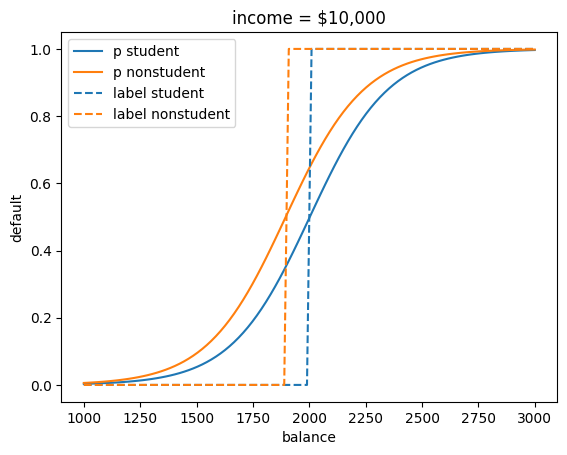

In [14]:
balance = np.linspace(1000, 3000, 100)

x_student = pd.DataFrame(
    {
        "income": [10000 for _ in balance],
        "balance": balance,
        "student": [1 for _ in balance],
    }
)

x_nonstudent = pd.DataFrame(
    {
        "income": [10000 for _ in balance],
        "balance": balance,
        "student": [0 for _ in balance],
    }
)

p_student = model.predict_proba(x_student)[:, 1]
p_nonstudent = model.predict_proba(x_nonstudent)[:, 1]

plt.plot(balance, p_student, label="p student")
plt.plot(balance, p_nonstudent, label="p nonstudent")

plt.plot(balance, p_student > 0.5, "--C0", label="label student")
plt.plot(balance, p_nonstudent > 0.5, "--C1", label="label nonstudent")

plt.title("income = $10,000")
plt.xlabel("balance")
plt.ylabel("default")
plt.legend()
plt.show()

### log-loss

In [15]:
from sklearn.metrics import log_loss

p = model.predict_proba(X)[:, 1]

train_loss = log_loss(y, p)
assert np.isclose(train_loss, -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p)))

In [16]:
Y = (y.to_numpy().reshape(-1, 1) == np.array([[0, 1]])).astype(int)

In [17]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [18]:
log_p = model.predict_log_proba(X)
log_p

array([[-1.43564040e-03, -6.54686199e+00],
       [-1.13169392e-03, -6.78460552e+00],
       [-9.76692617e-03, -4.63363297e+00],
       ...,
       [-2.94910692e-03, -5.82772709e+00],
       [-1.57994274e-01, -1.92315375e+00],
       [-3.37618939e-05, -1.02961947e+01]])

In [19]:
-np.mean((Y * log_p).sum(axis=1))

0.07857828941377155

### Fake data

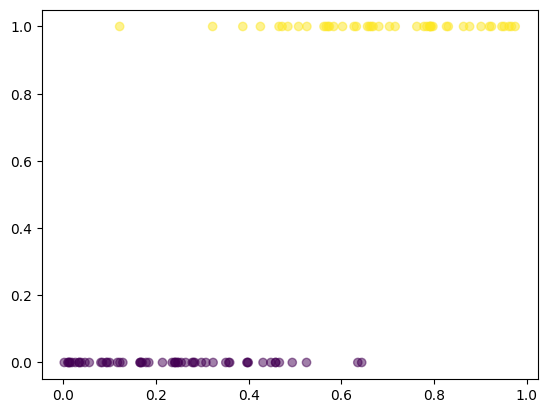

In [30]:
from scipy.special import expit

a = -5
b = 10

rng = np.random.default_rng()


def make_data(n):
    x = rng.uniform(size=n)
    p = expit(a + b * x)
    y = rng.uniform(size=n) < p
    return x, y


x, y = make_data(100)

plt.scatter(x, y, c=y, alpha=0.5)
plt.show()

In [58]:
X = x.reshape(-1, 1)
model = LogisticRegression(max_iter=10000, tol=0.000001, penalty=None)
model.fit(X, y)
ahat, bhat = model.intercept_.item(), model.coef_.item()
ahat, bhat

(-5.765318269548072, 12.129401961005003)

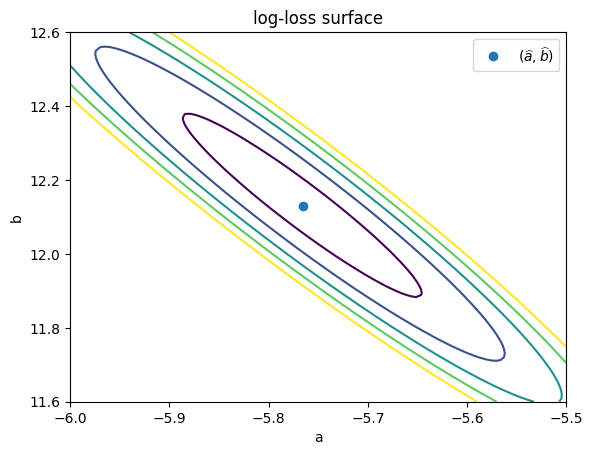

In [41]:
X = x.reshape(-1, 1, 1)
Y = y.astype(int).reshape((-1, 1, 1))

a = np.linspace(-6.0, -5.5, 100)
b = np.linspace(11.6, 12.6, 100)
A, B = np.meshgrid(a, b)
P = expit(A + B * X)

# log loss
loss = -np.mean(Y * np.log(P) + (1 - Y) * np.log(1 - P), axis=0)

plt.contour(
    A,
    B,
    loss,
    levels=[0.2646, 0.2647, 0.2648, 0.2649, 0.2650],
)
plt.plot(ahat, bhat, "o", label="$(\\widehat{{a}}, \\widehat{{b}})$")
plt.xlabel("a")
plt.ylabel("b")
plt.legend()
plt.title("log-loss surface")
plt.show()

In [42]:
import statsmodels.api as sm

In [50]:
X = np.ones((len(x), 2))
X[:, 1] = x
fit = sm.Logit(y, X).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.264548
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.6143
Time:                        14:22:16   Log-Likelihood:                -26.455
converged:                       True   LL-Null:                       -68.593
Covariance Type:            nonrobust   LLR p-value:                 4.302e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7652      1.185     -4.867      0.000      -8.087      -3.443
x1            12.1291      2.439      4.973      0.000       7.349      16.909
==============================================================================
"""

In [51]:
import bambi as bmb
import arviz as az

In [53]:
df = pd.DataFrame({"x": x, "y": y})
model = bmb.Model("y ~ x", df, family="bernoulli")
model

       Formula: y ~ x
        Family: bernoulli
          Link: p = logit
  Observations: 100
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            x ~ Normal(mu: 0.0, sigma: 3.4524)

In [54]:
fit = model.fit()

Modeling the probability that y==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, x]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [56]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4.478,0.796,-5.979,-3.060,0.013,0.009,3864.0,2665.0,1.0
x,9.367,1.581,6.702,12.564,0.025,0.018,3962.0,2775.0,1.0


In [59]:
df = pd.read_csv("../data/2024CFLScores.csv")
df = df[df["week"].str.startswith("Week")]
df = df[df["host_score"] != df["visitor_score"]]
df

,week,visitor,host,visitor_score,host_score
9,Week 1,MTL,WPG,27,12
10,Week 1,HAM,CGY,24,32
11,Week 1,SSK,EDM,29,21
12,Week 1,BC,TOR,27,35
13,Week 2,WPG,OTT,19,23
...,...,...,...,...,...
85,Week 20,MTL,BC,3,27
86,Week 21,HAM,OTT,31,37
87,Week 21,TOR,EDM,30,31
88,Week 21,WPG,MTL,28,27


In [60]:
teams = set(df["host"])
teams

{'BC', 'CGY', 'EDM', 'HAM', 'MTL', 'OTT', 'SSK', 'TOR', 'WPG'}

In [73]:
intercept = pd.Series(np.ones(len(df), dtype=int), name="intercept", index=df.index)
X = pd.DataFrame({"INTERCEPT": intercept})
for team in teams:
    if team != "CGY":
        X[team] = (df["host"] == team).astype(int) - (df["visitor"] == team).astype(int)
y = df["host_score"] > df["visitor_score"]
X

,INTERCEPT,WPG,EDM,TOR,SSK,MTL,BC,OTT,HAM
9,1,1,0,0,0,-1,0,0,0
10,1,0,0,0,0,0,0,0,-1
11,1,0,1,0,-1,0,0,0,0
12,1,0,0,1,0,0,-1,0,0
13,1,-1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
85,1,0,0,0,0,-1,1,0,0
86,1,0,0,0,0,0,0,1,-1
87,1,0,1,-1,0,0,0,0,0
88,1,-1,0,0,0,1,0,0,0


In [74]:
fit = sm.Logit(y, X).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.613740
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            8
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                 0.08371
Time:                        14:44:22   Log-Likelihood:                -48.485
converged:                       True   LL-Null:                       -52.915
Covariance Type:            nonrobust   LLR p-value:                    0.3543
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
INTERCEPT      0.4734      0.246      1.922      0.055      -0.009       0.956
WPG            1.3657      0.727      1.877      0.060      -0.060       2.791
EDM            0.4202      0.689      0.610      0.542      -0.929       1.770
TOR            1.1607      0.720      1.612      0.107      -0.250       2.572
SSK            0.9912      0.720      1.377      0.169      -0.420       2.403
MTL            1.8167      0.783      2.321      0.020       0.283       3.351
BC             0.8943      0.702      1.275      0.202      -0.481       2.270
OTT            1.0779      0.732      1.473      0.141      -0.356       2.512
HAM            0.4861      0.713      0.682      0.495      -0.911       1.883
==============================================================================
"""

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None, tol=0.0000001)
model.fit(X.drop(columns=["INTERCEPT"]), y)
coef_ = pd.Series(model.coef_.squeeze(), index=model.feature_names_in_, name="coef_")
print(coef_)
print(model.intercept_.item())

WPG    1.365688
EDM    0.420187
TOR    1.160717
SSK    0.991243
MTL    1.816699
BC     0.894312
OTT    1.077901
HAM    0.486129
Name: coef_, dtype: float64
0.47338692022733186


In [77]:
host_victory = df["host_score"] > df["visitor_score"]
X = pd.DataFrame({"host_victory": host_victory})
for team in teams:
    if team != "CGY":
        X[team] = (df["host"] == team).astype(int) - (df["visitor"] == team).astype(int)
X

,host_victory,WPG,EDM,TOR,SSK,MTL,BC,OTT,HAM
9,False,1,0,0,0,-1,0,0,0
10,True,0,0,0,0,0,0,0,-1
11,False,0,1,0,-1,0,0,0,0
12,True,0,0,1,0,0,-1,0,0
13,True,-1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
85,True,0,0,0,0,-1,1,0,0
86,True,0,0,0,0,0,0,1,-1
87,True,0,1,-1,0,0,0,0,0
88,False,-1,0,0,0,1,0,0,0


In [ ]:
model = bmb.Model(
    "host_victory ~ 1 + WPG + EDM + TOR + SSK + MTL + BC + OTT + HAM",
    X,
    family="bernoulli",
)
model

       Formula: host_victory ~ 1 + WPG + EDM + TOR + SSK + MTL + BC + OTT + HAM
        Family: bernoulli
          Link: p = logit
  Observations: 79
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            WPG ~ Normal(mu: 0.0, sigma: 2.095)
            EDM ~ Normal(mu: 0.0, sigma: 2.095)
            TOR ~ Normal(mu: 0.0, sigma: 2.095)
            SSK ~ Normal(mu: 0.0, sigma: 2.1565)
            MTL ~ Normal(mu: 0.0, sigma: 2.1565)
            BC ~ Normal(mu: 0.0, sigma: 2.095)
            OTT ~ Normal(mu: 0.0, sigma: 2.1565)
            HAM ~ Normal(mu: 0.0, sigma: 2.095)

In [83]:
fit = model.fit()

Modeling the probability that host_victory==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, WPG, EDM, TOR, SSK, MTL, BC, OTT, HAM]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [84]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.499,0.251,0.043,0.971,0.004,0.003,4027.0,2890.0,1.0
WPG,1.082,0.642,-0.143,2.283,0.012,0.009,2726.0,2633.0,1.0
EDM,0.127,0.613,-1.030,1.271,0.012,0.009,2729.0,2960.0,1.0
TOR,0.868,0.640,-0.361,2.026,0.012,0.009,2714.0,3066.0,1.0
SSK,0.704,0.635,-0.443,1.968,0.012,0.009,2679.0,3009.0,1.0
MTL,1.527,0.679,0.132,2.716,0.013,0.009,2567.0,2799.0,1.0
BC,0.609,0.643,-0.537,1.876,0.012,0.009,2861.0,3211.0,1.0
OTT,0.791,0.649,-0.454,1.974,0.013,0.009,2706.0,2719.0,1.0
HAM,0.171,0.642,-0.996,1.449,0.012,0.009,2717.0,3165.0,1.0


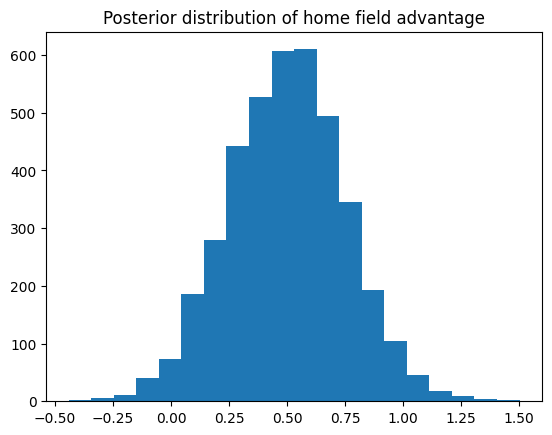

In [85]:
hfa = np.array(fit.posterior.Intercept).ravel()
plt.hist(hfa, bins=20)
plt.title("Posterior distribution of home field advantage")
plt.show()

In [86]:
np.mean(hfa > 0)

0.97725

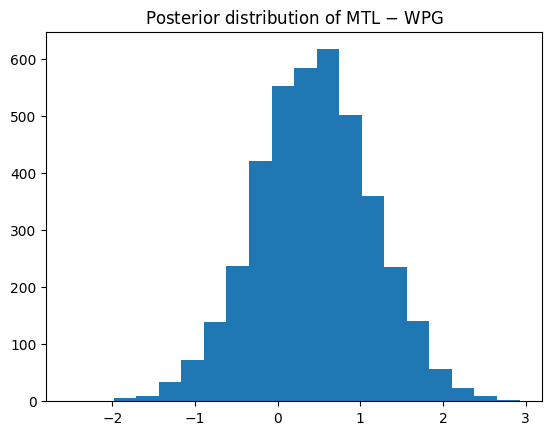

In [87]:
mtl = np.array(fit.posterior.MTL).ravel()
wpg = np.array(fit.posterior.WPG).ravel()

plt.hist(mtl - wpg, bins=20)
plt.title("Posterior distribution of MTL $-$ WPG")
plt.show()

In [ ]:
np.mean(mtl > wpg)

0.733

In [89]:
np.mean(mtl > wpg + hfa)

0.4705

In [90]:
np.mean(mtl + hfa > wpg)

0.8965